## 필수과제2 
- call_data 
- 해당 데이터를 본인의 로직으로 전처리를 진행해 주세요.
- 머신에 바로 학습할 수 있는 데이터 전처리 형태로 만들어서 CSV파일로 저에게 전달해 주셔야 합니다.
- 수업시간에 여러분들이 만든 전처리 데이터를 모델링 돌려보면서 차이를 비교할 예정 
- 전처리하면서 꼭 로직을 정확하게 정리 잘 해주시고 해당 로직에 대한 주석처리도 코드와 함께 정리해서 제출해 주세요!
- 총 제출해야하는 내용은 1. csv파일 2. 데이터 전처리 코드와 주석

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (45.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and dir

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/call_data.csv')

In [4]:
df.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [5]:
df.isnull().sum() # 결측치는 존재하지 않음

ID         0
가입일        0
음성사서함이용    0
주간통화시간     0
주간통화횟수     0
주간통화요금     0
저녁통화시간     0
저녁통화횟수     0
저녁통화요금     0
밤통화시간      0
밤통화횟수      0
밤통화요금      0
상담전화건수     0
전화해지여부     0
dtype: int64

In [6]:
df.info() # 따로 문자열 처리는 할 필요 없어보임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [7]:
df.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


array([[<Axes: title={'center': '가입일'}>,
        <Axes: title={'center': '음성사서함이용'}>,
        <Axes: title={'center': '주간통화시간'}>],
       [<Axes: title={'center': '주간통화횟수'}>,
        <Axes: title={'center': '주간통화요금'}>,
        <Axes: title={'center': '저녁통화시간'}>],
       [<Axes: title={'center': '저녁통화횟수'}>,
        <Axes: title={'center': '저녁통화요금'}>,
        <Axes: title={'center': '밤통화시간'}>],
       [<Axes: title={'center': '밤통화횟수'}>,
        <Axes: title={'center': '밤통화요금'}>,
        <Axes: title={'center': '상담전화건수'}>]], dtype=object)

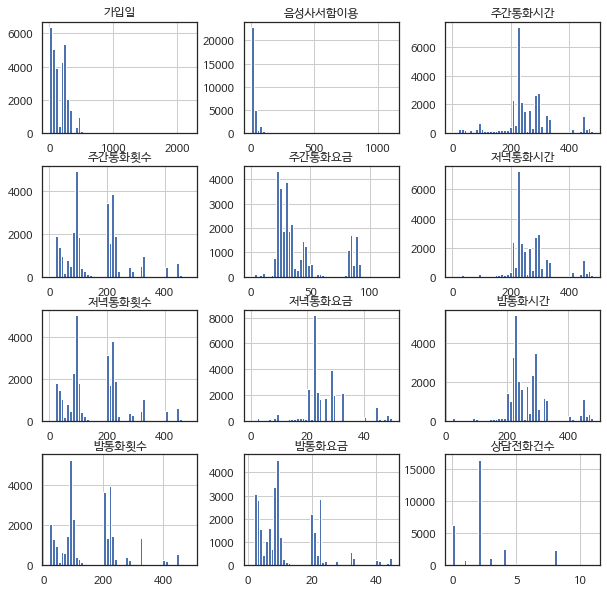

In [ ]:
# feature 별 히스토그램 분포를 확인
df.drop(['전화해지여부'], axis = 1).hist(bins = 50, figsize = (10, 10))

- 다른 feature 들에 비해 가입일과 음성사서함이용이 skew 되어 있는 것을 확인
- 이상치를 제거하거나 로그 스케일링을 통해 분포를 안정화 시켜주는 작업이 필요해보임

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
import numpy as np
skew(np.int64(df.drop(['ID'], axis = 1)))

array([ 3.10654992, 10.15898938,  0.17773167,  0.76600138,  1.19352691,
        0.76819043,  0.80109471,  0.57525388,  0.78263177,  0.8083557 ,
        1.27260423,  1.55448461,  2.49505449])

In [ ]:
skew(df[['가입일', '음성사서함이용']]) # 절댓값 3을 초과

array([ 3.10654992, 10.15898938])

In [ ]:
kurtosis(np.int64(df.drop(['ID'], axis = 1)))

array([3.98784291e+01, 3.78195548e+02, 1.51485495e+00, 2.45034809e-01,
       2.41553348e-02, 2.08766118e+00, 2.86442498e-01, 2.01797851e+00,
       2.08831442e+00, 3.15671912e-01, 1.29636053e+00, 2.40215281e+00,
       4.22529691e+00])

In [ ]:
kurtosis(df[['가입일', '음성사서함이용']], fisher = True) # 절댓값 10을 초과

array([ 39.8784291 , 378.19554768])

- 실제 왜도 첨도 값을 본 결과,
- 두 컬럼 가입일과 음성사서함이용에 로그 스케일링을 할 필요가 있어보임

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kw

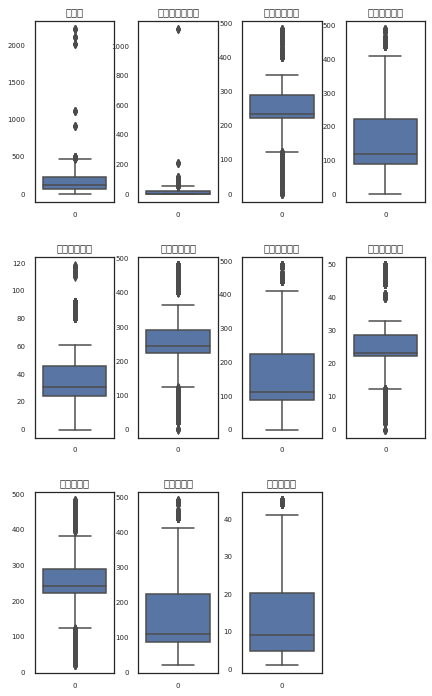

In [ ]:
# boxplot을 통해 이상치 탐색
import seaborn as sns
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(6, 2)
plt.figure(figsize= (7, 12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
features = df.columns.drop(['ID', '상담전화건수', '전화해지여부'])

lower = []
upper = []

for idx, feature in enumerate(features):
    sns.set_style('white')
    ax = plt.subplot(grid[idx])
    sns.boxplot(df[feature])
    plt.rc('font', family = 'NanumBarunGothic') 
    ax.set_title(f'{feature}', fontsize = 10)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)

    lower.append(ax.lines[2].get_ydata()[1])
    upper.append(ax.lines[3].get_ydata()[1])

In [ ]:
# 이상치를 capping 함
for idx, feature in enumerate(features):
  df.loc[df[feature] > upper[idx], feature] = upper[idx]
  df.loc[df[feature] < lower[idx], feature] = lower[idx]

In [ ]:
df

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,122.9,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,55,323.9,323,61.1,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,122.9,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,55,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,55,210.7,280,61.1,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kw

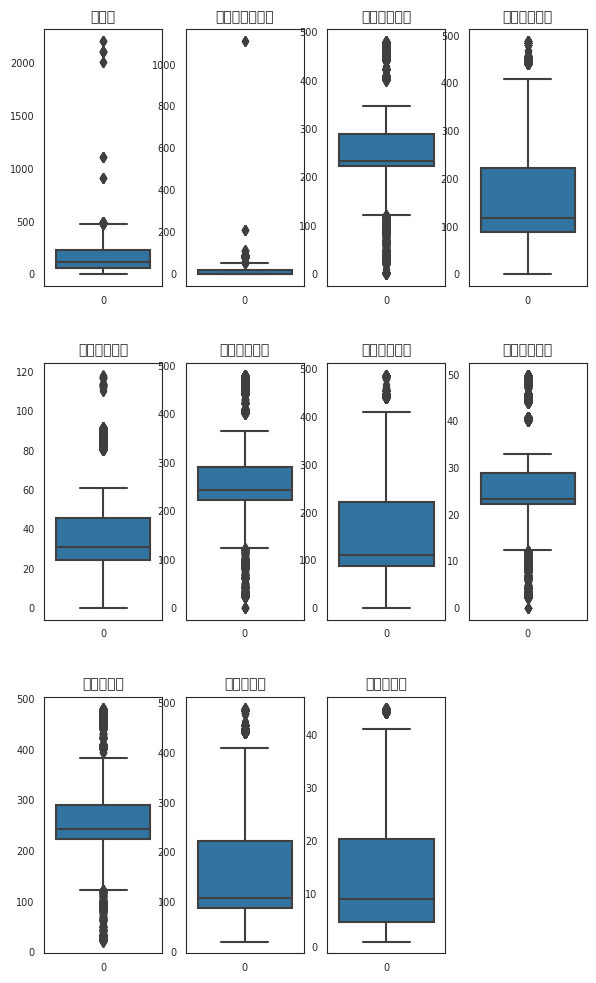

In [10]:
# 이상치 제거 후 boxplot 확인
import seaborn as sns
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(3, 4)
plt.figure(figsize= (7, 12))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
features = df.columns.drop(['ID', '상담전화건수', '전화해지여부'])

for idx, feature in enumerate(features):
    sns.set_style('white')
    ax = plt.subplot(grid[idx])
    sns.boxplot(df[feature])
    plt.rc('font', family='NanumBarunGothic') 
    ax.set_title(f'{feature}', fontsize = 10)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)

In [ ]:
# 이상치 제거 후 왜도 확인인
skew(np.int64(df.drop(['ID', '상담전화건수', '전화해지여부'], axis = 1)))

array([ 0.65500725,  1.51504632, -0.27321822,  0.62518689,  0.62730268,
        0.19870372,  0.65688974, -0.37419699,  0.42636604,  0.66501411,
        1.16994983])

In [ ]:
# 이상치 제거 후 첨도 확인인
kurtosis(np.int64(df.drop(['ID', '상담전화건수', '전화해지여부'], axis = 1)), fisher = True)

array([-0.20793219,  0.93853175, -0.14097662, -0.22824502, -0.80027289,
        0.0553687 , -0.20248951, -0.09276194,  0.3191619 , -0.17705578,
        0.80416652])

<ipython-input-202-412145879b7b>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-202-412145879b7b>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-202-412145879b7b>:10: UserWarning: 

`distplot` is a deprecated function and will be remo

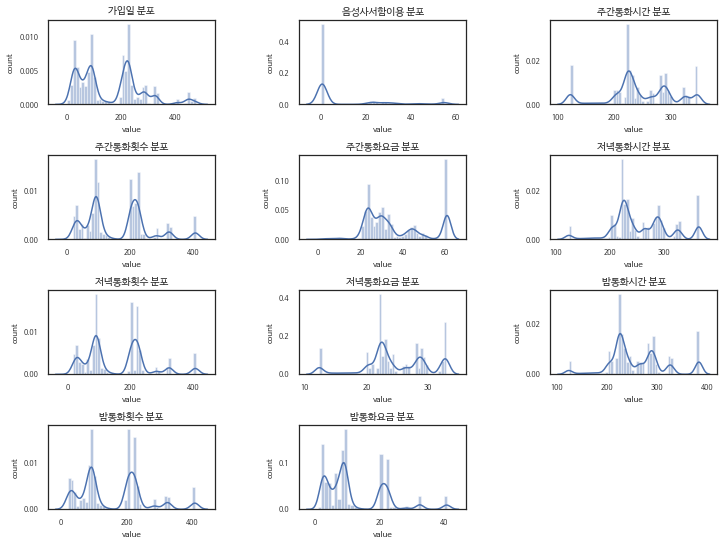

In [ ]:
# 변수들의 분포 확인인
grid = gridspec.GridSpec(4, 3)
plt.figure(figsize=(12 ,9))
plt.subplots_adjust(wspace = 0.5, hspace=0.6)

for idx, feature in enumerate(features):
    sns.set(style = 'white') 
    plt.rc('font', family = 'NanumBarunGothic')
    ax = plt.subplot(grid[idx])
    sns.distplot(df[feature])
    ax.set_title(f'{feature} 분포', fontsize = 10)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)
    plt.xlabel('value', size = 8)
    plt.ylabel('count', size = 8)

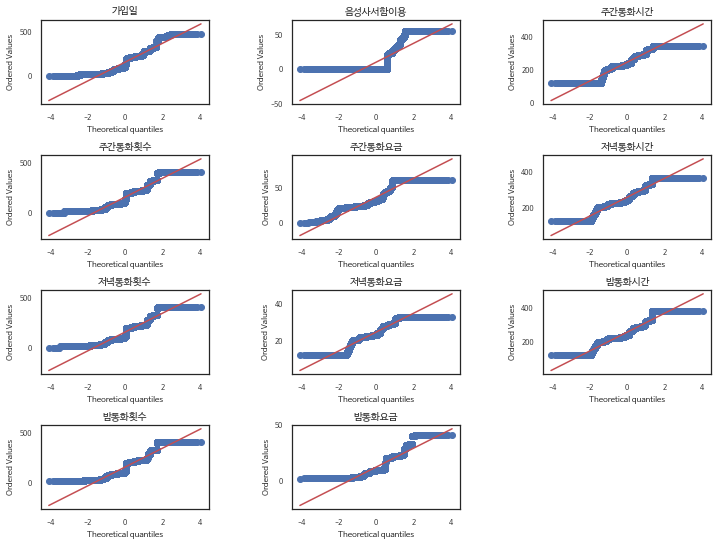

In [ ]:
# 정규성 검정
import scipy.stats as stats

grid = gridspec.GridSpec(4, 3)
plt.figure(figsize=(12, 9))
plt.subplots_adjust(wspace = 0.5, hspace = 0.6)

for idx, feature in enumerate(features):
    plt.rc('font', family = 'NanumBarunGothic')
    plt.rc('axes', unicode_minus = False)
    ax = plt.subplot(grid[idx])
    stats.probplot(df[feature], dist = stats.norm, plot = ax)
    ax.set_title(f'{feature}', fontsize= 10)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)
    plt.xlabel('Theoretical quantiles', size = 8)
    plt.ylabel('Ordered Values', size = 8)

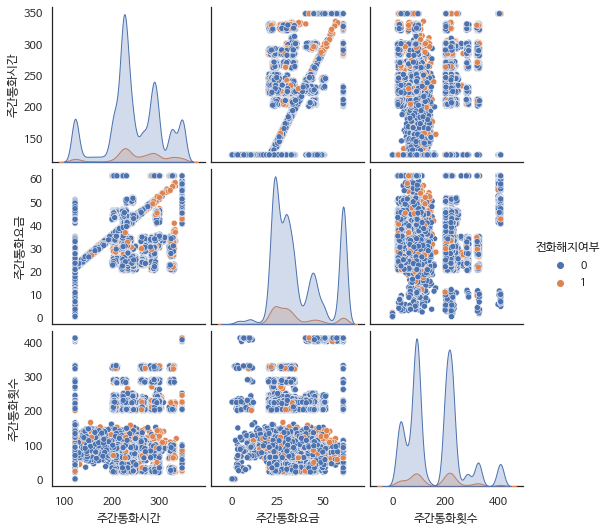

In [ ]:
attributes = ['주간통화시간', '주간통화요금', '주간통화횟수', '전화해지여부']
sns.pairplot(df[attributes], hue = '전화해지여부') # 상관관계 확인

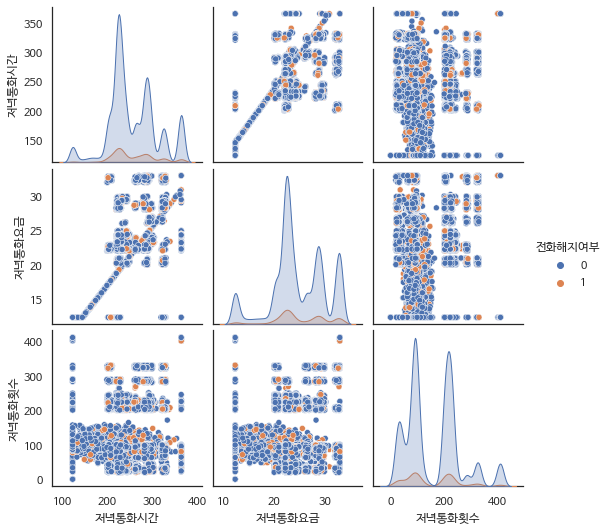

In [ ]:
attributes = ['저녁통화시간', '저녁통화요금', '저녁통화횟수', '전화해지여부']
sns.pairplot(df[attributes], hue = '전화해지여부') # 상관관계 확인인

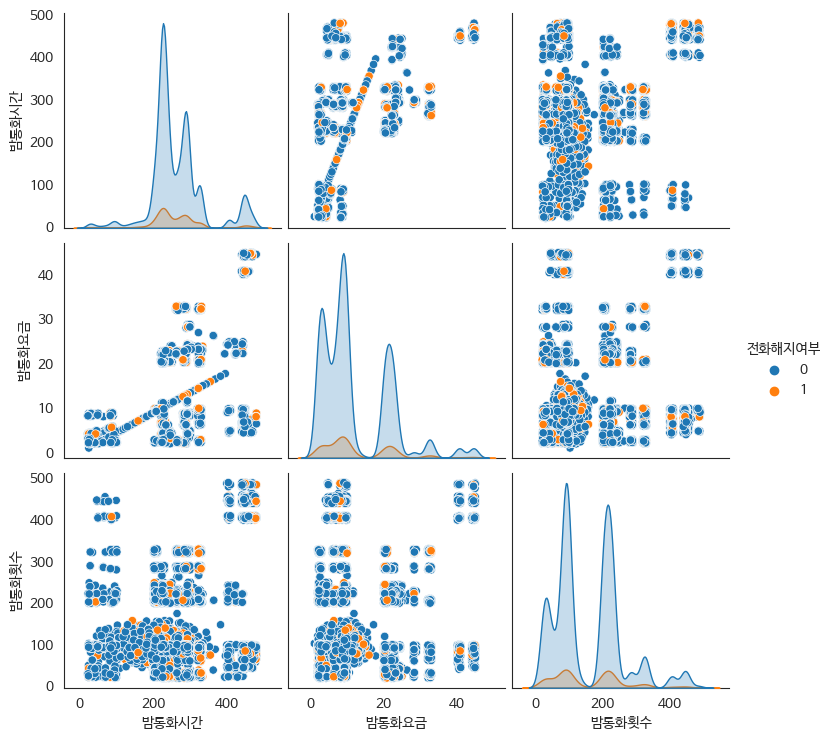

In [11]:
attributes = ['밤통화시간','밤통화요금', '밤통화횟수', '전화해지여부']
sns.pairplot(df[attributes], hue = '전화해지여부') # 상관관계 확인인

<Axes: >

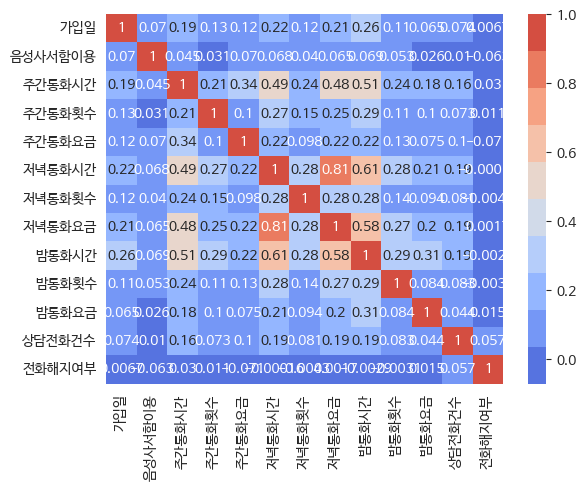

In [13]:
sns.heatmap(df.corr(), cmap = sns.color_palette("coolwarm", 10), annot = df.corr())

In [ ]:
df

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,122.9,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,55,323.9,323,61.1,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,122.9,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,55,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,55,210.7,280,61.1,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = df.set_index('ID') # input과 target을 나누고 합치는 과정에서 index 통일

In [ ]:
# 설명변수로 들어갈 컬럼을 train_input에 저장 
train_input = df.drop(['전화해지여부'], axis = 1)
train_input

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TRAIN_00000,329,0,122.9,93,27.3,268.8,68,28.92,262.9,328,32.89,2
TRAIN_00001,2,55,323.9,323,61.1,269.4,326,32.09,322.8,209,32.32,2
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0
TRAIN_00004,222,0,122.9,222,28.7,223.9,69,28.08,263.1,223,2.80,8
...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,263,55,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2
TRAIN_30196,283,55,210.7,280,61.1,284.1,202,32.80,287.8,203,6.28,2
TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2


In [ ]:
# target이 될 컬럼을 train_target에 저장
train_target = df['전화해지여부']
train_target

ID
TRAIN_00000    0
TRAIN_00001    0
TRAIN_00002    0
TRAIN_00003    0
TRAIN_00004    0
              ..
TRAIN_30195    0
TRAIN_30196    0
TRAIN_30197    0
TRAIN_30198    1
TRAIN_30199    0
Name: 전화해지여부, Length: 30200, dtype: int64

- 이진 분류 문제이므로 standardscaling을 진행하는 것이 적합해보임

In [ ]:
# standardscaling 진행
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)

In [ ]:
train_scaled = pd.DataFrame(data = train_scaled, index = train_input.index, columns = train_input.columns)
train_scaled

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TRAIN_00000,1.515557,-0.597845,-2.122296,-0.659644,-0.632016,0.209216,-0.900781,0.797068,0.063800,1.740718,2.255039,-0.140478
TRAIN_00001,-1.389869,2.632574,1.317451,1.669571,1.709988,0.220348,1.699342,1.389898,1.112888,0.536461,2.193433,-0.140478
TRAIN_00002,-0.581325,1.046732,0.607254,1.669571,-0.153915,-0.937390,1.659030,1.526417,0.377301,1.740718,-0.404811,-1.115749
TRAIN_00003,0.573737,-0.539111,-0.436649,0.656869,-0.784455,-0.454999,-0.971327,-0.141736,-0.971276,0.789456,-0.288085,-1.115749
TRAIN_00004,0.564852,-0.597845,-2.122296,0.646742,-0.535010,-0.623836,-0.890703,0.639977,0.067303,0.678138,-0.997090,2.785335
...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,0.929141,2.632574,0.730469,0.434075,-1.013112,0.426292,1.669108,0.976600,-0.897717,-0.910673,-0.296731,-0.140478
TRAIN_30196,1.106843,2.632574,-0.619760,1.234109,1.709988,0.493084,0.449670,1.522677,0.499898,0.475742,-0.620972,-0.140478
TRAIN_30197,-1.194397,-0.597845,-0.419536,-1.267265,-0.992325,-0.438301,-1.263589,-0.455917,0.601479,-0.617198,-0.843617,-0.140478


In [ ]:
# 스케일링 된 데이터의 통계량 확인
print('feature 들의 평균 값')
print(train_scaled.mean())
print('\nfeature들의 분산 값')
print(train_scaled.var()) 
# standard 스케일링된 값들의 평균과 분산을 구함, 평균은 0 분산은 1에 가까운 값

feature 들의 평균 값
가입일        6.823092e-17
음성사서함이용    6.070200e-17
주간통화시간     1.560488e-16
주간통화횟수    -1.068167e-16
주간통화요금     5.931385e-16
저녁통화시간     6.818387e-16
저녁통화횟수     9.693497e-17
저녁통화요금    -3.529186e-18
밤통화시간      1.125693e-15
밤통화횟수      9.599385e-17
밤통화요금      3.058628e-18
상담전화건수     1.444613e-16
dtype: float64

feature들의 분산 값
가입일        1.000033
음성사서함이용    1.000033
주간통화시간     1.000033
주간통화횟수     1.000033
주간통화요금     1.000033
저녁통화시간     1.000033
저녁통화횟수     1.000033
저녁통화요금     1.000033
밤통화시간      1.000033
밤통화횟수      1.000033
밤통화요금      1.000033
상담전화건수     1.000033
dtype: float64


<ipython-input-216-c360fcba3627>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_scaled[feature])
<ipython-input-216-c360fcba3627>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_scaled[feature])
<ipython-input-216-c360fcba3627>:11: UserWarning: 

`distplot` is a deprecated funct

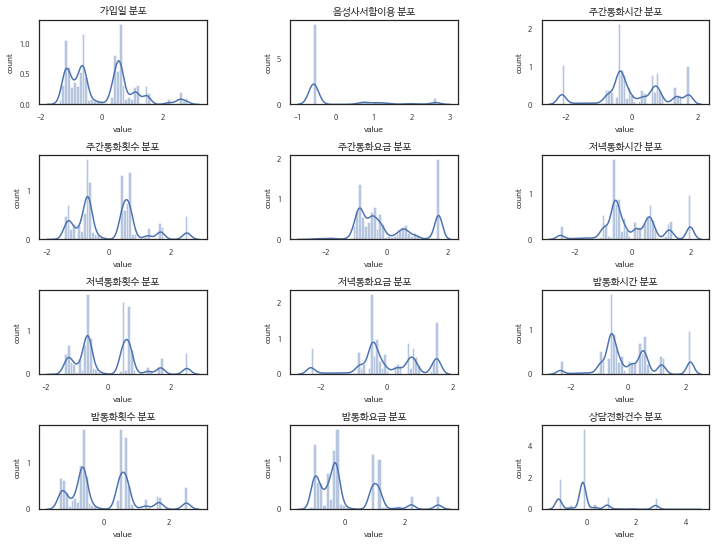

In [ ]:
# 분포 확인
grid = gridspec.GridSpec(4, 3)
plt.figure(figsize=(12 ,9))
plt.subplots_adjust(wspace = 0.5, hspace=0.6)
features = train_scaled.columns

for idx, feature in enumerate(features):
    sns.set(style = 'white') 
    plt.rc('font', family = 'NanumBarunGothic')
    ax = plt.subplot(grid[idx])
    sns.distplot(train_scaled[feature])
    ax.set_title(f'{feature} 분포', fontsize = 10)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)
    plt.xlabel('value', size = 8)
    plt.ylabel('count', size = 8)

In [ ]:
# 최종데이터 완성
train = pd.concat([train_scaled, train_target], axis = 1)
train

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,1.515557,-0.597845,-2.122296,-0.659644,-0.632016,0.209216,-0.900781,0.797068,0.063800,1.740718,2.255039,-0.140478,0
TRAIN_00001,-1.389869,2.632574,1.317451,1.669571,1.709988,0.220348,1.699342,1.389898,1.112888,0.536461,2.193433,-0.140478,0
TRAIN_00002,-0.581325,1.046732,0.607254,1.669571,-0.153915,-0.937390,1.659030,1.526417,0.377301,1.740718,-0.404811,-1.115749,0
TRAIN_00003,0.573737,-0.539111,-0.436649,0.656869,-0.784455,-0.454999,-0.971327,-0.141736,-0.971276,0.789456,-0.288085,-1.115749,0
TRAIN_00004,0.564852,-0.597845,-2.122296,0.646742,-0.535010,-0.623836,-0.890703,0.639977,0.067303,0.678138,-0.997090,2.785335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_30195,0.929141,2.632574,0.730469,0.434075,-1.013112,0.426292,1.669108,0.976600,-0.897717,-0.910673,-0.296731,-0.140478,0
TRAIN_30196,1.106843,2.632574,-0.619760,1.234109,1.709988,0.493084,0.449670,1.522677,0.499898,0.475742,-0.620972,-0.140478,0
TRAIN_30197,-1.194397,-0.597845,-0.419536,-1.267265,-0.992325,-0.438301,-1.263589,-0.455917,0.601479,-0.617198,-0.843617,-0.140478,0


In [ ]:
train.to_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/call_train_임재성87.csv')